In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
RR = np.array([  4.57211431e-11,   2.02135580e-10,   9.91426892e-10,   4.97157272e-09,
   2.51995690e-08,   1.26024315e-07,   6.33625258e-07,   3.15477090e-06,
   1.56313056e-05,   7.68936211e-05,   3.72985139e-04,   1.76488020e-03,
   7.98772411e-03,  3.32514735e-02,   1.16322169e-01])

In [4]:
DD = np.array(
[  1.73860663e-08,   6.36727077e-08,   8.15689256e-08,   1.68005950e-07,
   3.96513004e-07,   9.66487212e-07,   2.56822639e-06,   7.69884131e-06,
   2.62253300e-05,   9.97930845e-05,   4.14111488e-04,   1.82704581e-03,
   8.04874381e-03,   3.27968556e-02,   1.13173410e-01])

In [5]:
DR = np.array(
[  4.21115138e-11,   1.98525708e-10,   1.02150501e-09,   5.06300715e-09,
   2.48951238e-08,   1.27039609e-07,   6.31690755e-07,   3.15691610e-06,
   1.56333713e-05,   7.68163066e-05,   3.72435365e-04,   1.76310246e-03,
   7.97933028e-03,   3.30495068e-02,   1.14788184e-01])

In [6]:
CorrFunc = ( DD -2*DR + RR)/ RR

In [7]:
CorrFunc

array([  3.79421056e+02,   3.14035717e+02,   8.12135954e+01,
         3.27565375e+01,   1.47590749e+01,   6.65294082e+00,
         3.05933217e+00,   1.43902050e+00,   6.77479749e-01,
         2.99818009e-01,   1.13210669e-01,   3.72382726e-02,
         9.74086723e-03,  -1.52427832e-03,  -6.94527971e-04])

In [8]:
DistanceBins = np.array(
[  4.21696503e-02,   7.21661162e-02,   1.23499917e-01,   2.11348904e-01,
   3.61687361e-01,   6.18965819e-01,   1.05925373e+00,   1.81273088e+00,
   3.10217766e+00,   5.30884444e+00,   9.08517576e+00,   1.55477184e+01,
   2.66072506e+01,   4.55337410e+01,   7.79231798e+01]) #,#   1.33352143e+02])

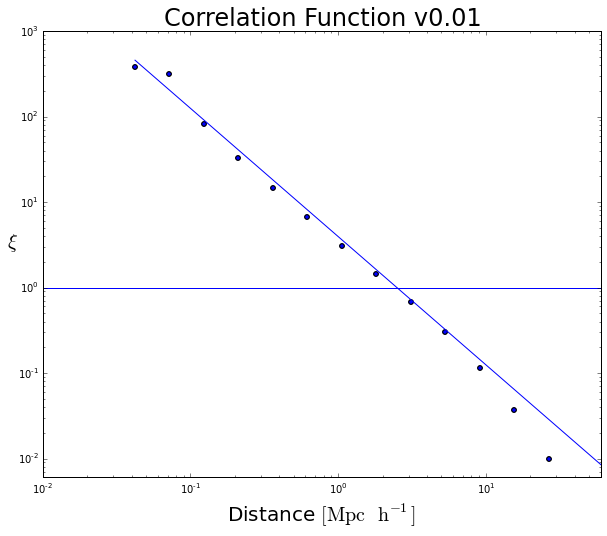

In [17]:
gamma = 1.5
R0 = 2.5

guess = (DistanceBins/R0)**-(gamma)


fig = figure(figsize=[10,8])
title("Correlation Function v0.01", fontsize=24)
scatter(DistanceBins,CorrFunc)
scatter(DistanceBins,CorrFunc)
plot(DistanceBins,guess)

xlim(0.01,60); ylim(0.006,1000)
yscale('log'); xscale('log')
xlabel(r'Distance $[ \mathrm{Mpc\;h}^{-1}]$', fontsize=20)
ylabel(r'$\xi$', rotation=0, size=20)
axhline(y=1)



In [31]:
Rp = logspace(-1,2,10)

In [32]:
from scipy import special

In [33]:
scipy.special.gamma(2)

1.0

In [34]:
A = (R0**gamma) * (scipy.special.gamma(0.5)*scipy.special.gamma(0.5*(gamma-1)))/scipy.special.gamma(0.5*gamma)

In [35]:
A

20.729185069034269

In [36]:
wp = A * Rp**(1-gamma)

In [37]:
wp

array([ 65.55143886,  44.65967541,  30.42628266,  20.72918507,
        14.12262939,   9.62163539,   6.55514389,   4.46596754,
         3.04262827,   2.07291851])

In [38]:
Rp

array([   0.1       ,    0.21544347,    0.46415888,    1.        ,
          2.15443469,    4.64158883,   10.        ,   21.5443469 ,
         46.41588834,  100.        ])

In [44]:
DD = np.genfromtxt("../results02/DD.dat", delimiter=',') 
DR = np.genfromtxt("../results02/DR.dat", delimiter=',') 
RR = np.genfromtxt("../results02/RR.dat", delimiter=',') 

Conroy = np.genfromtxt("../data/Conroy2006/correlationz3.dat"); 
DIST = np.logspace(-1,2,15)

PCorrFunc = np.zeros(15)
CorrFunc = ( DD -2*DR + RR)/ (RR)     ## Landy-Szalay

for m in range(15):                 ## Integration over R_parallel
    PCorrFunc[m] = sum(CorrFunc[m])
    
PCorrFunc2 = np.zeros(15)
CorrFunc1 = DD/ RR -1               ## Classic
for m in range(15):                 ## Integration over R_parallel
    PCorrFunc2[m] = sum(CorrFunc[m])

PCorrFunc01 = PCorrFunc

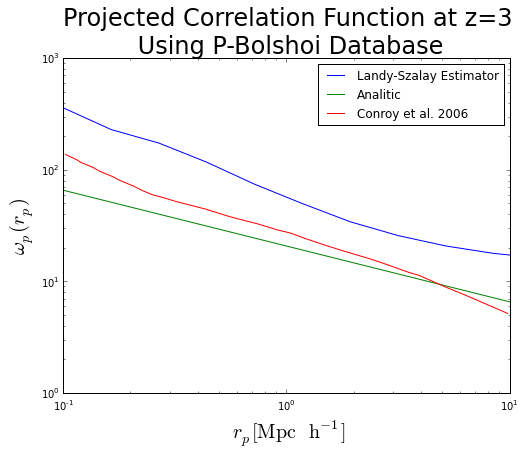

In [46]:
fig = figure(figsize=[8,6])
title("Projected Correlation Function at z=3 \n Using P-Bolshoi Database", fontsize=24)

plot(DIST,PCorrFunc01, label='Landy-Szalay Estimator')

plot(Rp,wp, label='Analitic')


plot(Conroy[:,0],Conroy[:,1], label='Conroy et al. 2006')


yscale('log'); xscale('log')
xlabel(r' $r_p [ \mathrm{Mpc\;h}^{-1}]$', fontsize=20)
ylabel(r'$\omega_p(r_p)$', rotation=90, size=20)

xlim(0.1,10)
#ylim(1,500)
legend()